# Analysing World Happiness Data from 2015-2019

The **WORLD HAPPINESS REPORT** is a publication of the [Sustainable Development Solutions Network](https://www.unsdsn.org/) powered by the Gallup Poll. It is a survey on the state of global happiness ranking 156 countries by how happy their citizens perceive themselves to be. The following datasets contain the World Happiness Reports from 2017-2019. Moreover these reports try to conclude the contributing factors determining happiness of citizens in a country.

To obtain more information about these datasets, you can check this [Kaggle Profile](https://www.kaggle.com/unsdsn/world-happiness)

In [1]:
#installing the jovian library
!pip install jovian

     |████████████████████████████████| 65 kB 165 kB/s eta 0:00:011
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6500 sha256=76c874031729a3a48689027b3632ca0effa33d1a51fa581de2027bbcd99bccf4
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid


In [2]:
#importing the libraries required for visualisation
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import jovian
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<IPython.core.display.Javascript object>

/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2018.csv


In [3]:
#loading the datasets y1,y2,y3 corresponding to 2017,2018 and 2019
y1_df=pd.read_csv('/kaggle/input/world-happiness/2017.csv',index_col=1)
y2_df=pd.read_csv('/kaggle/input/world-happiness/2015.csv',index_col=2)
y3_df=pd.read_csv('/kaggle/input/world-happiness/2019.csv',index_col=0)

Each numerical value in a row of any of the above dataset contributes to the happiness score of the corresponding country.

In [4]:
y1_df.drop(['Whisker.low','Whisker.high'],axis=1,inplace=True)

In [5]:
#renaming columns in y1 for convenience
y1_col={'Country':'Country','Happiness.Rank':'rank','Happiness.Score':'Score','Economy..GDP.per.Capita.':'GDP_per_capita','Family':'Family','Health..Life.Expectancy.':'life_expectancy','Freedom':'Freedom','Generosity':'Generosity','Trust..Government.Corruption.':'corr_perception','Dystopia.Residual':'dystopia_residual'}
y1_df.rename(columns=y1_col,inplace=True)

In [37]:
#renaming in y2
y2_df.drop(['Standard Error'],axis=1,inplace=True)
y2_col={'Country':'Country','Happiness Score':'Score','Economy (GDP per capita)':'GDP_per_capita','Family':'Social support','Health(Life Expectancy)':'life_expectancy','Freedom':'Freedom','Trust (Government corruption)':'corr_perception','Generosity':'Generosity','Dystopia Residual':'dystopia_residual'}
y2_df.rename(columns=y2_col,inplace=True)

In [7]:
#renaming in y3
y3_col={'Overall rank':'rank','Country or region':'Country','Score':'Score','GDP per capita':'GDP_per_capita','Social support':'Social support','Healthy life expectancy':'life_expectancy','Freedom to make life choices':'Freedom','Generosity':'Generosity','Perceptions of corruption':'corr_perception'}
y3_df.rename(columns=y3_col,inplace=True)

**EXPLAINING THE DYSTOPIA RESIDUAL METRIC**

**DYSTOPIA RESIDUAL** : Dystopia is a hypothetical country consisting of the least happy people. It was formed so as to create a benchmark to compare Happiness Scores of other countries with it. 
The Dystopia Residual is calculated as (Score of Dystopia+ **Residual** for the corresponding country). Here the Residual is a value generated for each country, which indicates if the 6 variables have under or over explained the life evaluations for each country for that particular year.

In [8]:
#setting a darkgrid style for each visualisation
sns.set_style("darkgrid")
project_name='World Happiness Report'

# **Distribution of scores across different countries**

Have people been relatively more happier in coming years?

Text(0.5, 1.0, 'Distribution of Happiness scores across 2015,2017')

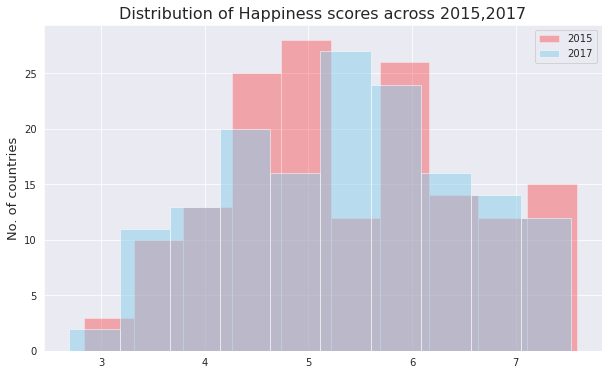

In [9]:
#for 2015 and 2017
plt.figure(figsize=(10,6))
a=10
plt.hist(y2_df.Score,a,label='2015',alpha=0.3,color='red')
plt.hist(y1_df.Score,a,label='2017',alpha=0.5,color='skyblue')
plt.ylabel('No. of countries',size=13)
plt.legend(loc='upper right')
plt.title("Distribution of Happiness scores across 2015,2017",size=16)

As observed from the stacked histogram, we find that the extremum values have slightly shifted to the left, we can conclude that living standards had hit a new low in 2017. Meanwhile,we observe a significant increase in the number of countries having a score ranging from 5-6 in 2017 as compared to 2015, which shows a lower number. 

We can safely conlcude that the moderately happy countries became happier in 2017 and the living standards at the extremums fell to some extent.

Text(0.5, 1.0, 'Distribution of Happiness scores across 2017,2019')

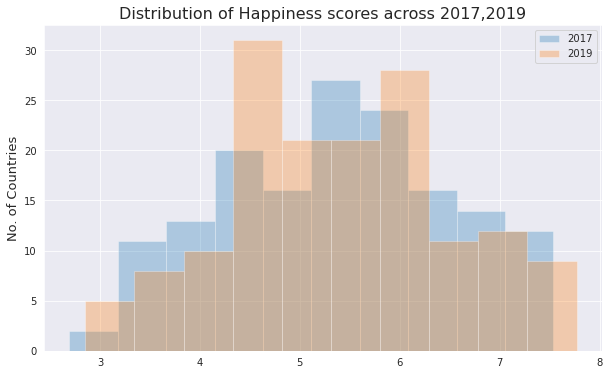

In [10]:
#for 2017 and 2019
plt.figure(figsize=(10,6))
b=10
plt.hist(y1_df.Score,b,label='2017',alpha=0.3)
plt.hist(y3_df.Score,b,label='2019',alpha=0.3)
plt.ylabel("No. of Countries",size=13)
plt.legend(loc="upper right")
plt.title('Distribution of Happiness scores across 2017,2019',size=16)

The stacked histogram plotted above shows that there has been an increase in the happines score at the extremums as there appears to be a shift to the right in the year 2019. A significant increase in the number of countries with score between 4-5 has been observed. This may signify relatively better living standards and satisfaction of the people with their lives and the government in 2019.

We can conclude that people have been happier in 2019 as compared to 2017.

# **Correlating features with the happiness scores**

Is there a strong relation between happiness scores of a country and its economic and legal state?

To answer this we will find out the correlation values between Happiness Scores and:
1. corr_perception
2. GDP_per_capita
3. Freedom

across the three datasets.

In [11]:
#correlation values for 2015 dataset
#creating a copy of the dataset with 4 columns.
y2=y2_df.copy()
y2.drop(['Standard Error','Social support','Health (Life Expectancy)','Generosity','dystopia_residual'],axis=1,inplace=True)

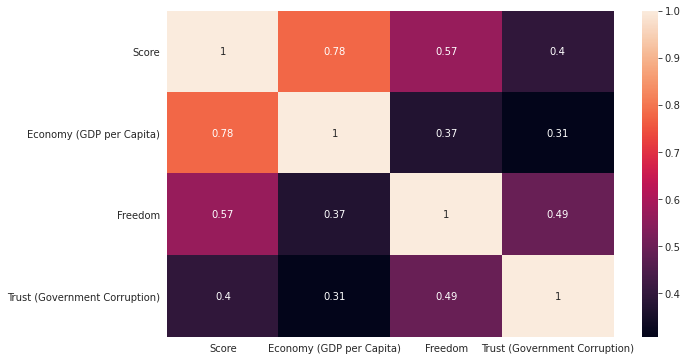

In [12]:
#creating a correlation matrix between numeric columns
c2=y2.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(c2,annot=True)

In [13]:
#correlations for 2017 dataset
y1=y1_df.copy()
y1.drop(['Family','life_expectancy','Generosity','dystopia_residual'],axis=1,inplace=True)


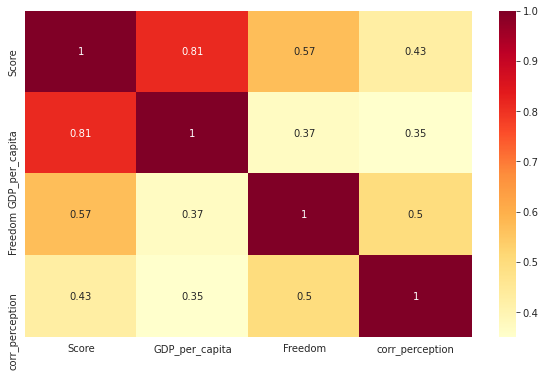

In [14]:
c1=y1.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(c1,annot=True,cmap="YlOrRd")

In [15]:
#correlations for 2019 dataset
y3=y3_df.copy()
y3.drop(['Social support',
       'life_expectancy', 'Generosity'],axis=1,inplace=True)

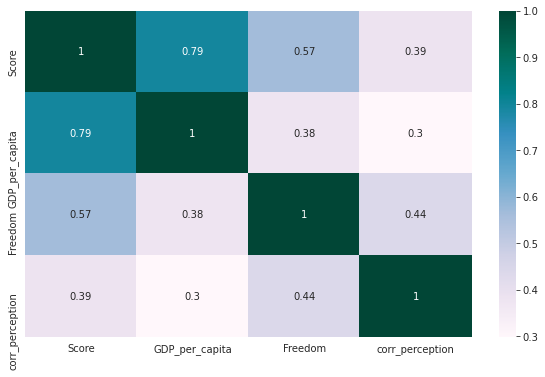

In [16]:
c3=y3.corr()
plt.figure(figsize=(10,6))
sns.heatmap(c3,annot=True,cmap='PuBuGn')

The 3 heatmaps plotted above display correlation matrices between 4 columns, Score, GDP, Freedom and Perception of Corruption corresponding to each of the years 2015,2017,2019. Now the effects of the 3 factors on Score will be discussed.

1. How is GDP related to Happiness Score?

From the heatmaps,Correlation coefficient between GDP_per_capita and Score is ~ 0.79 in all the 3 years indicating a strong positive relationship between the satisfaction of citizens with the GDP and the Happiness score. GDP_per capita is a tracker of the economic growth of a country. People in countries showing positive growth rate of economies tend to be more happier as it leads to higher incomes and better standards of living. Hence, we conclude that the GDP of a country should be one of the top priorities to ensure satisfaction.

2. Relation of Freedom to Happiness Score?

The correlation coefficient between Freedom and Score is exactly 0.57 in all 3 years indicating a moderately positive relationship between the perception of Freedom and the Happiness Score of a country. Generalising this perception of freedom is a hard task because according to [research](https://globescan.com/a-deeper-look-at-freedom-how-perceptions-differ-across-countries-and-groups/) it is different for people belonging to different parts of the world. Nevertheless, it is still a significant contributor to the Happiness Score of a nation.  


3. How does perception of corruption affect the Happiness score?

Correlation coefficient between corr_perception and Score is ~0.4 in all three years. This indicates a weak positive relationship between perception of corruption and the happiness score of a country. 


In [17]:
#creating new datasets comprising of below mentioned columns
x1=y1_df[['Generosity','Family','Score']].copy()
x2=y2_df[['Generosity','Social support','Score']].copy()
x3=y3_df[['Generosity','Social support','Score']].copy()

How does the perception of social state of a country affect its Happiness Score?

To answer this question, we will plot correlation heatmaps of 3 columns from each dataset:
1. Generosity
2. Family
3. Score

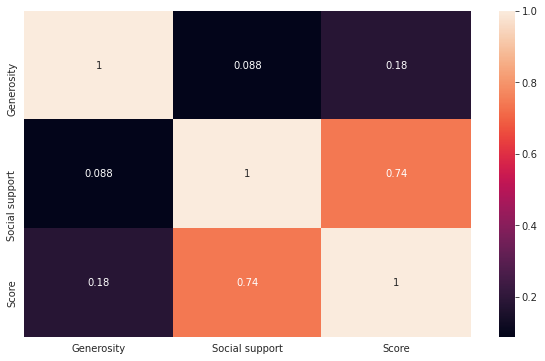

In [18]:
#for year 2015
a2=x2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(a2,annot=True)

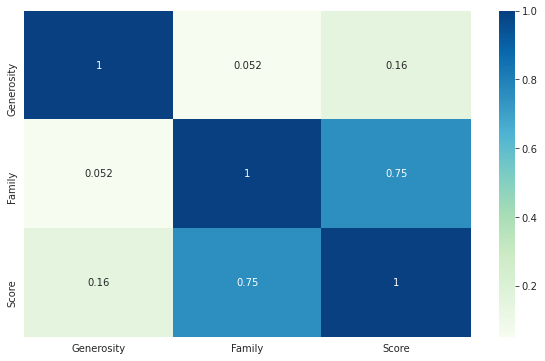

In [19]:
#for year 2017
a1=x1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(a1,annot=True,cmap='GnBu')

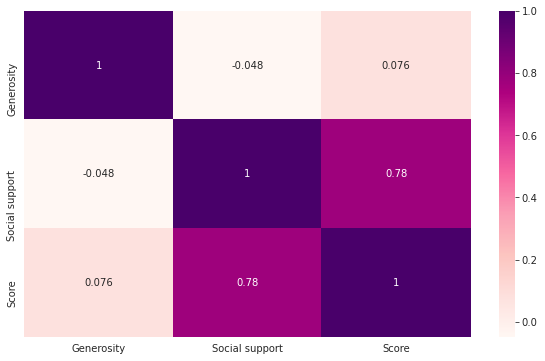

In [20]:
#for year 2019
a3=x3.corr()
plt.figure(figsize=(10,6))
sns.heatmap(a3,annot=True,cmap='RdPu')

How do Generosity and Social Support relate to Happiness Score?

Correlation coefficients are observed to be 0.16,0.18 and 0.076 which indicate very weak positive relationship. Not much of a linear change is observed between the two metrics. Generosity is a perception which citizens obtain from each other. On the other hand, correlation values of Social Support with Score are 0.74,0.75 and 0.78 which indicates strong positive relationship. Social support is the perception of how happy people are with their families and friends, acquaintainces, etc.

Since these are the people everyone deals with almost everyday in life, we can consider the perception of Social Support to be a critical factor in determination of Happiness Score.




In [22]:
#committing notebook to Jovian profile.
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/nalinrajput2001/World Happiness Report


<IPython.core.display.Javascript object>

# Where does India stand among its close neighbours?

Plotting stacked bar plot to compare ranks of India with Pakistan,China,Nepal and Sri Lanka.

In [55]:
#creating a new dataFrame containing ranks of the 4 countries in 2015,2017 and 2019
#IPNC
rank_df=pd.DataFrame({'India':[117,122,140],'Pakistan':[81,80,67],'Nepal':[121,99,100],'China':[84,79,93]},index=['2015','2017','2019'],dtype='int64')

In [56]:
rank_df

,India,Pakistan,Nepal,China
2015,117,81,121,84
2017,122,80,99,79
2019,140,67,100,93


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

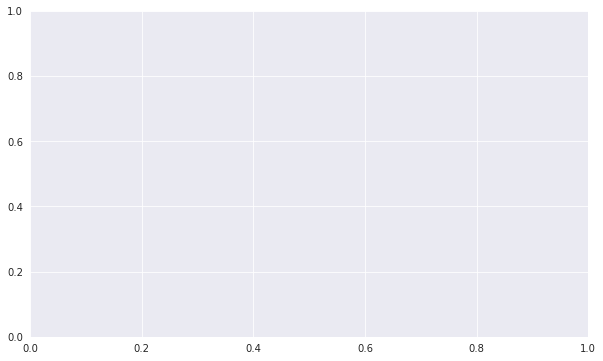

In [60]:
plt.figure(figsize=(10,6))
plt.bar('India',height=, width=0.8, bottom=None,align='center', data=rank_df)
plt.bar('Pakistan',height=None, width=0.8, bottom=None,align='center', data=rank_df)


let us compare how each country has performed relatively